# Octave + Jupyter Examples

* Exercises to run Octave in Jupyter that are aligned with signal processing at the SEA project group
* Database of octave Packages: https://gnu-octave.github.io/packages/

In [1]:
pkg load signal #loading package
pkg load communications 

Link for the example below: https://octave.sourceforge.io/signal/function/gauspuls.html

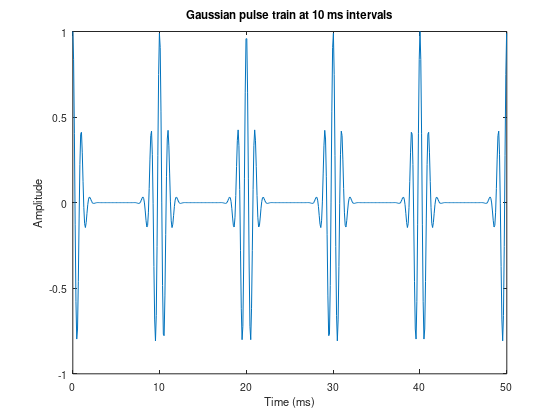

In [2]:
 fs = 11025;  # arbitrary sample rate
 f0 = 100;    # pulse train sample rate
 d = 5;
 x = pulstran (0:1/fs:d/f0, 0:1/f0:d/f0, "gauspuls");
 plot ([0:length(x)-1]*1000/fs, x);
 xlabel ("Time (ms)");
 ylabel ("Amplitude");
 title ("Gaussian pulse train at 10 ms intervals");

* Below, more examples for generating pulse train
* Link for code below: https://octave.sourceforge.io/signal/function/pulstran.html

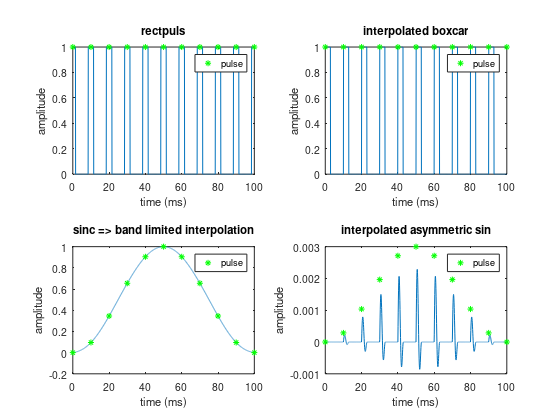

In [3]:
fs = 11025;                   # arbitrary sample rate
 f0 = 100;                     # pulse train sample rate
 w = 0.003;                    # pulse width of 3 milliseconds
 t = 0:1/fs:0.1; d=0:1/f0:0.1; # define sample times and pulse times
 a = hanning(length(d));       # define pulse amplitudes

 subplot(221);
 x = pulstran(t', d', 'rectpuls', w);
 plot([0:length(x)-1]*1000/fs, x);
 hold on; plot(d*1000,ones(size(d)),'g*;pulse;'); hold off;
 ylabel("amplitude"); xlabel("time (ms)");
 title("rectpuls");

 subplot(223);
 x = pulstran(f0*t, [f0*d', a], 'sinc');
 plot([0:length(x)-1]*1000/fs, x);
 hold on; plot(d*1000,a,'g*;pulse;'); hold off;
 ylabel("amplitude"); xlabel("time (ms)");
 title("sinc => band limited interpolation");

 subplot(222);
 pulse = boxcar(30);  # pulse width of 3 ms at 10 kHz
 x = pulstran(t, d', pulse, 10000);
 plot([0:length(x)-1]*1000/fs, x);
 hold on; plot(d*1000,ones(size(d)),'g*;pulse;'); hold off;
 ylabel("amplitude"); xlabel("time (ms)");
 title("interpolated boxcar");

 subplot(224);
 pulse = sin(2*pi*[0:0.0001:w]/w).*[w:-0.0001:0];
 x = pulstran(t', [d', a], pulse', 10000);
 plot([0:length(x)-1]*1000/fs, x);
 hold on; plot(d*1000,a*w,'g*;pulse;'); hold off; title("");
 ylabel("amplitude"); xlabel("time (ms)");
 title("interpolated asymmetric sin");

 %----------------------------------------------------------
 % Should see (1) rectangular pulses centered on *,
 %            (2) rectangular pulses to the right of *,
 %            (3) smooth interpolation between the *'s, and
 %            (4) asymmetric sines to the right of *

## Plot of sinc function Example

In [4]:
#initial parameters
Rb = 20e3 #Bandwidth of pulse signal in Hz
k = 1024 #upsampling factor (symbol period per sample)
f_sampling = k*Rb #sampling frequency
t_step = 1/f_sampling 
t_init = 0 #initial time of pulse
#oversample for good resolution (choose one to keep only @upsampling factor)
oversamp = 12
numPoints = oversamp*round(f_sampling/Rb) #points per pulse of transmission
t_end = numPoints*t_step #symbol period (end of pulse shape format)
#time vector
time = linspace(t_init,t_end,numPoints);
t_disp = t_end/2

#generate sinc filter
vsinc = sinc(Rb*(time-t_disp));

Rb = 20000
k = 1024
f_sampling = 2.0480e+07
t_step = 4.8828e-08
t_init = 0
oversamp = 12
numPoints = 12288
t_end = 6.0000e-04
t_disp = 3.0000e-04


## Generating pulse sequence

Reference: https://www.sharetechnote.com/html/Octave_Matlab_SignalProcessing.html#SignalProcessing_RRC_Filter

In [14]:
numBits = 1024; #number of bits
data = randi([0 1],numBits,1); # This would generate random data of {0, 1}
data = round(2*(data - 0.5)); #This is to convert the data {0,1} into {-1,1}

disp("Lenght of data in bits")
disp(length(sig))
disp("Modulated Data (Bipolar)")
disp(data(1:10))

Lenght of data in bits
error: 'sig' undefined near line 1, column 13
Modulated Data (Bipolar)
   1
  -1
   1
  -1
   1
   1
   1
   1
   1
  -1


ans = 25
st = 0.2500


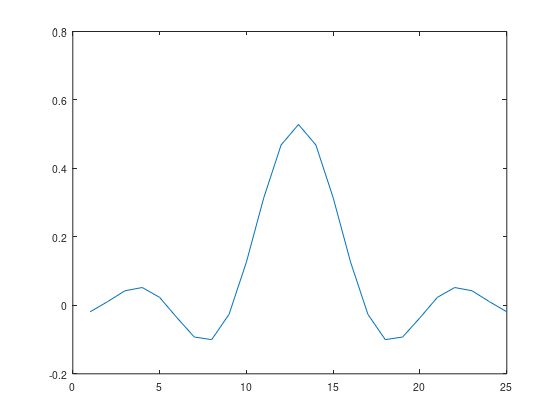

In [30]:
#Generating raised cosine filter
#ex: h = rcosfir(0.2,[-3 3],4,1,'sqrt'); 
data_rate = 50e3;
Ts = 1/50e3;

[h,st] = rcosfir(0.2,[-3 3],4,1,'sqrt');
plot(h)
length(h)
st

st = 0.2500


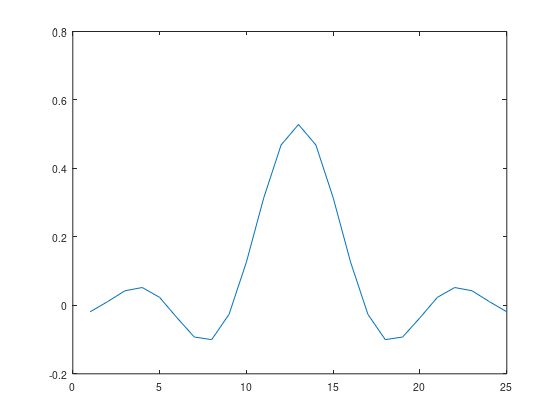

In [32]:
#Generating raised cosine filter
#ex: h = rcosfir(0.2,[-3 3],4,1,'sqrt'); 
[h,st] = rcosfir(0.2,[-3 3],4,1,'sqrt');
plot(h)
st